## Get the cleaned dataset and selected features

In [2]:
import os
from pathlib import Path
import pandas as pd

# Load data
path = Path(os.getcwd() + "/..").resolve()
dataset_path = path/'Datasets/Tabular/FOOD-DATA-GROUP.csv'
df = pd.read_csv(dataset_path)

df = df.drop("food", axis=1)
features = df.drop("Caloric Value", axis=1).columns.tolist()
target = "Caloric Value"

# Data transformation
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Transform the data
df_transformed = pt.fit_transform(df)

# Convert back to DataFrame
df = pd.DataFrame(df_transformed, columns=df.columns)

# Remove outliers
from scipy.stats import zscore
import numpy as np

X = df[features]

# Calculate Z-scores for the features
z_scores = np.abs(zscore(X))

# Define a threshold for Z-scores
threshold = 3

# Find rows where all features have Z-scores greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove rows where any feature's Z-score exceeds the threshold
X_clean_zscore = X[~outliers]

# Get the indices of the rows that are not outliers
valid_indices = X[~outliers].index

df = df.loc[valid_indices]

# Selected features
df['Protein+Carbohydrates+Fat'] = df['Protein']+df['Carbohydrates']+df['Fat']
df['Total Fats'] = df['Polyunsaturated Fats'] + df['Saturated Fats'] + df['Monounsaturated Fats']

new_features = ['Protein+Carbohydrates+Fat', 'Total Fats']

selected_features = ['Nutrition Density', 'Zinc', 'Vitamin B3', 'Calcium', 'Sodium', 'Dietary Fiber', 'Vitamin C', 'Selenium', 'Protein+Carbohydrates+Fat', 'Total Fats']

X = df[selected_features]

## Graphical model - Elbow method

### Implement KMeans

In [5]:
from sklearn.cluster import KMeans

# Generate KMeans model for clusters in range 1 to 7 inclusive and a random generator seed of 42 for reproducibility.
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 8)]

# Extract interia from each KMeans model
inertias = [model.inertia_ for model in kmeans_per_k]

### Plot inertia values

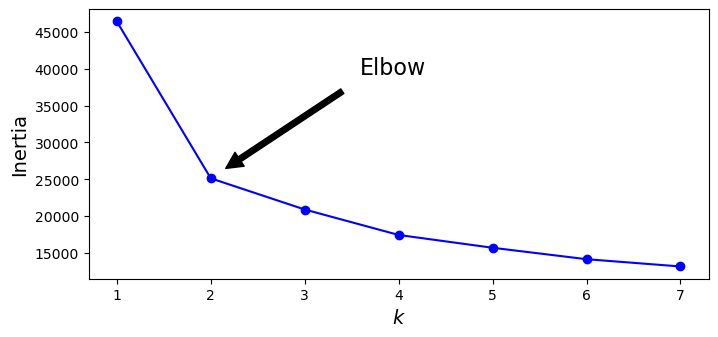

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 8), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.45, 0.75),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

It can be observed that there is an elbow at k = 2, indicating that the data can be divided into 2 clusters.
